In [15]:
from math import log
from math import sqrt
from ipywidgets import widgets, interact
from IPython.display import display
%matplotlib inline
import seaborn as sbn
import matplotlib.pyplot as plt
import numpy as np
from IPython.core.pylabtools import figsize
from ipywidgets import widgets, interact
from IPython.display import display
%matplotlib inline
import seaborn as sbn
import matplotlib.pyplot as plt
import numpy as np
from IPython.core.pylabtools import figsize
figsize(12, 10)
sbn.set_context("talk", font_scale=1)
figsize(12, 10)
sbn.set_context("talk", font_scale=1)
def Rice(Fluid_temp,
             Air_temp,
             Fluid_h,
             Pipe_k,
             Pipe_Radius_Internal,
             Pipe_Radius_External,
         Pipe_Length=1,
         Water_h=2250,
             Air_h=50,
             Tsurf=273.15
            ):

    Tair=(Air_temp+273.15)
    WA_h=Air_h/Water_h
    L=Pipe_Length
    Ri=(Pipe_Radius_Internal*0.01) #m
    Ro=(Pipe_Radius_External*0.01) #m
    Tfluid=(Fluid_temp+273.15)
    Resistance_fluid = 1/(Fluid_h)*(2)*(3.14159)*(Ri)*(L)
    Resistance_Pipe=(Ro-Ri)/(2*3.14*Pipe_k)
    Resistance_Iceonwall= 1 / (Water_h)*(2)*(3.14159)*(Ro)*(L)
    Resistance_Sub=Resistance_fluid+Resistance_Pipe+Resistance_Iceonwall

    Rice=-100*((WA_h+1)*(Tsurf-Tair)-(Tfluid-Tair))/(((Resistance_Sub)+(Tsurf-Tair))*(Air_h*2*3.14159*L))
    return Rice
def Rate(Air_temp,
        Fluid_temp,
         time,
         k=2.22,
         roe=1000,
         Hia=10,
         fusion=334 #j
        ):

    Tair=(Air_temp+273.15)
    Tfluid=(Fluid_temp+273.15)
    t=(time*30)

    Rate=sqrt(((2*k)/(roe*fusion))*(abs(Tfluid-Tair))*t+((k/Hia)*(k/Hia)))-(k/Hia)
    return Rate

print ("Temperatures are in degrees C\nh is in w/m2k\nk is in w2/m2k\nlength is in meters\npipe radius is in cm\ntime is in minutes")
@interact(Fluid_Temp=widgets.FloatSlider(value=-10, min=-273, max=50, step=1), 
          Air_Temp=widgets.FloatSlider(value=25, min=10, max=100, step=1),
          h_of_Fluid=widgets.FloatSlider(value=10, min=0.1, max=100, step=.1), 
          k_of_Pipe=widgets.FloatSlider(value=16, min=0.1, max=100, step=0.1), 
          Pipe_R_int=widgets.FloatSlider(value=1, min=0.1, max=20, step=0.1),
          Pipe_R_ext=widgets.FloatSlider(value=1, min=0.1, max=20, step=0.1),
          time=widgets.FloatSlider(value=5, min=0, max=100, step=.5))
def final(Fluid_Temp,Air_Temp,h_of_Fluid,k_of_Pipe,Pipe_R_int,Pipe_R_ext,time):
    ball = Rice(Fluid_temp = Fluid_Temp,
             Air_temp = Air_Temp,
             Fluid_h = h_of_Fluid,
             Pipe_k = k_of_Pipe,
             Pipe_Radius_Internal = Pipe_R_int,
             Pipe_Radius_External = Pipe_R_ext,
            Pipe_Length = 1,
             Water_h=2250,
             Air_h=50,
             Tsurf=273.15
                )
    growth = Rate(Fluid_temp = Fluid_Temp,
             Air_temp = Air_Temp,
             time = time,
             k=2.22,
             roe=1000,
             Hia=10,
             fusion=334
                         )

    
    if Pipe_R_int > Pipe_R_ext:
        return print("The internal radius cannot be larger that the external radius")
    if ball>0 and growth<ball:
        return print("The current thickness of the ice is {} cm".format(round(growth, 2)),"\nThe max thickness of the ice is {} cm".format(round(ball, 2)))
    if ball>0 and growth>=ball:
        return print("The current thickness of the ice is {} cm".format(round(ball, 2)),"\nThe max thickness of the ice is {} cm".format(round(ball, 2)))
    else:
        return print("The thickness of the ice is 0 cm")

Temperatures are in degrees C
h is in w/m2k
k is in w2/m2k
length is in meters
pipe radius is in cm
time is in minutes


interactive(children=(FloatSlider(value=-10.0, description='Fluid_Temp', max=50.0, min=-273.0, step=1.0), Floa…

In [10]:
number_sims = 1000

# Make some random data in the correct ranges
mc_Fluid_Temp = np.random.uniform(2.3, 22, number_sims)
mc_Air_Temp = np.random.uniform(50, 100, number_sims)
mc_h_of_Fluid = np.random.uniform(0, 80, number_sims)
mc_k_of_Pipe = np.random.uniform(0, 80, number_sims)
mc_Ri = np.random.uniform(0.5, 24, number_sims)
mc_Ro = np.random.uniform(0.5, 24, number_sims)


data = np.array((mc_Fluid_Temp, 
                 mc_Air_Temp, 
                 mc_h_of_Fluid, 
                 mc_k_of_Pipe, 
                 mc_Ri,
                 mc_Ro
                 ))

y = Rice(mc_Fluid_Temp, 
                 mc_Air_Temp, 
                 mc_h_of_Fluid, 
                 mc_k_of_Pipe, 
                 mc_Ri,
                 mc_Ro
                 )


In [11]:
data.shape

(6, 1000)

Text(0,0.5,'Max Power (kW)')

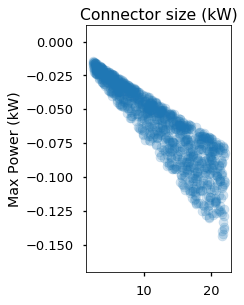

In [14]:
plt.subplot(241)
plt.scatter(mc_Fluid_Temp, y, alpha=0.2)
plt.title("Connector size (kW)")
plt.ylabel("Max Power (kW)")

In [16]:
import SALib
from SALib.sample import morris as ms
from SALib.analyze import morris as ma
from SALib.plotting import morris as mp
morris_problem = {
    # There are six variables
    'num_vars': 7,
    # These are their names
    'names': ['Fluid_Temp', 'Air_Tem', 'h_of_Fluid', 'k_of_Pipe', 'Pipe_Length', 'Pipe_R_in', 'Pipe_R_ext'],
    # These are their plausible ranges over which we'll move the variables
    'bounds': [[-273, 50], 
               [10, 100], 
               [0.1, 100], 
               [0.1, 100], 
               [0.1, 100], 
               [0.1, 20], 
               [0.1, 20] 
              ],
    # I don't want to group any of these variables together
    'groups': None
    }

In [17]:
num_levels = 4
grid_jump = 2
trajectories = int(1e4)
sample = ms.sample(morris_problem, trajectories, num_levels, grid_jump)
sample.shape

(80000, 7)

In [18]:
print(sample.T.shape)
print(sample.T)

(7, 80000)
[[ 5.00000000e+01  5.00000000e+01  5.00000000e+01 ... -1.65333333e+02
  -1.65333333e+02 -1.65333333e+02]
 [ 1.00000000e+02  1.00000000e+02  1.00000000e+02 ...  1.00000000e+01
   7.00000000e+01  7.00000000e+01]
 [ 3.34000000e+01  3.34000000e+01  1.00000000e+02 ...  1.00000000e+02
   1.00000000e+02  1.00000000e+02]
 ...
 [ 6.67000000e+01  1.00000000e-01  1.00000000e-01 ...  1.00000000e+02
   1.00000000e+02  3.34000000e+01]
 [ 1.00000000e-01  1.00000000e-01  1.00000000e-01 ...  1.33666667e+01
   1.33666667e+01  1.33666667e+01]
 [ 2.00000000e+01  2.00000000e+01  2.00000000e+01 ...  1.33666667e+01
   1.33666667e+01  1.33666667e+01]]


In [19]:
output = Rice(*sample.T)
print(output.shape)
print(output)

(80000,)
[-0.0085251  -0.00831175 -0.00831154 ...  0.42928123  0.05639386
  0.05594397]


In [20]:
Si = ma.analyze(morris_problem, 
                sample, 
                output, 
                print_to_console=False, 
                grid_jump=grid_jump, 
                num_levels=num_levels)
print("{:20s} {:>7s} {:>7s} {:>7s}".format("Name", "mu", "mu_star", "sigma"))
for name, s1, st, mean in zip(morris_problem['names'], Si['mu'], Si['mu_star'], Si['sigma']):
    print("{:20s} {:=7.2f} {:=7.2f} {:=7.2f}".format(name, s1, st, mean))

Name                      mu mu_star   sigma
Fluid_Temp           - 10.89   10.90   30.35
Air_Tem              -  7.58    9.41   29.00
h_of_Fluid           -  1.13    1.43   12.88
k_of_Pipe               0.21    0.28    3.11
Pipe_Length             0.97    1.30   11.08
Pipe_R_in               0.02    0.03    0.25
Pipe_R_ext           - 11.53   14.08   34.06


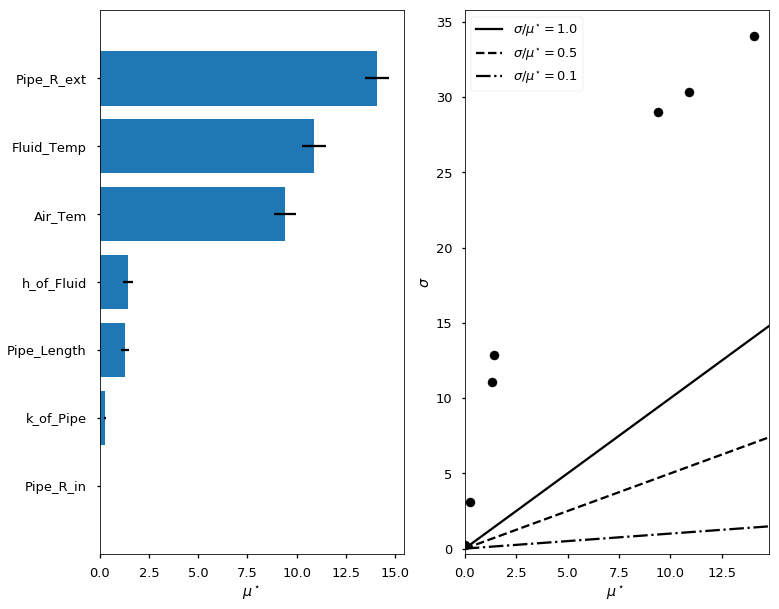

In [21]:
fig, (ax1, ax2) = plt.subplots(1,2)
mp.horizontal_bar_plot(ax1, Si, param_dict={})
mp.covariance_plot(ax2, Si, {})